In [56]:
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import plotly.plotly as py
import plotly
from scipy import stats

In [57]:
def Box_Muller(u1,u2,n):
    #u1=np.random.random(n)
    #u2=np.random.random(n)
    r=np.sqrt(-2*np.log(u1))
    theta=2*np.pi*u2
    x=r*np.cos(theta)
    y=r*np.sin(theta)
    return x,y
    

In [102]:
n=1000
u1=np.random.random(n)
u2=np.random.random(n)
(x,y)=Box_Muller(u1, u2, n)

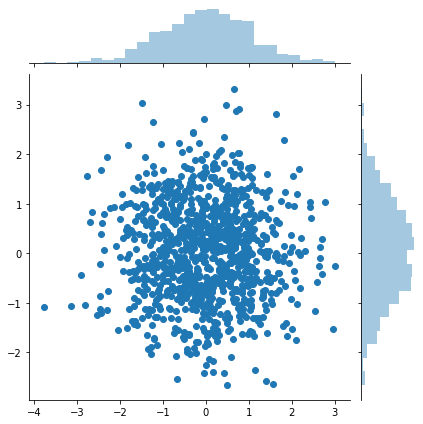

In [103]:
sns.jointplot(x, y, kind='scatter')

In [104]:
def test_norm_bm(u1, u2, n):
    from scipy import stats
    import pandas as pd
    (x,y)=Box_Muller(u1, u2, n)
    stat_x, p_x_dp=stats.normaltest(x)
    stat_y, p_y_dp=stats.normaltest(y)
    D_x, p_x_ks=stats.kstest(x, 'norm')
    D_y, p_y_ks=stats.kstest(y, 'norm')
    p_value={"p-value x":[p_x_dp, p_x_ks], "p-valye y":[p_y_dp, p_y_ks]}
    df=pd.DataFrame(data=p_value, index=["D'Agostino-Pearson", "Kolmogorov-Smirnov"])
    return df

In [105]:
test_norm_bm(u1, u2, n)

,p-value x,p-valye y
D'Agostino-Pearson,0.629684,0.266972
Kolmogorov-Smirnov,0.923533,0.167891


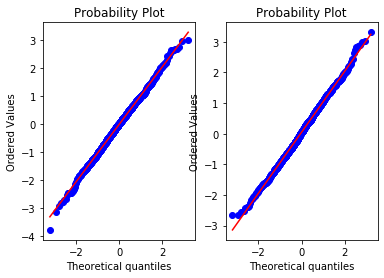

In [106]:
#Wykres kwantylowy
plt.subplot(121)
stats.probplot(x, dist=stats.norm, plot=plt)
plt.subplot(122) 
stats.probplot(y, dist=stats.norm, plot=plt)
plt.show()

In [107]:
def centralne_twierdzenie_graniczne(u):
    import numpy as np
    n=len(u)
    m=[np.mean(np.random.choice(u, 30)) for _ in range(1000)]
    return m

In [108]:
z=centralne_twierdzenie_graniczne(u1)

<function matplotlib.pyplot.show(*args, **kw)>

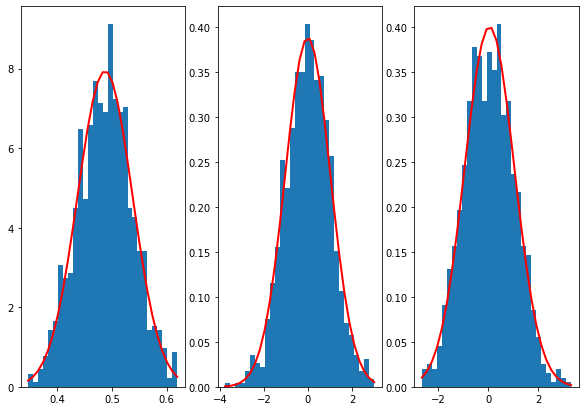

In [122]:
#Histogramy wraz z dopasowaniami ich rozkładów normalnych na podstawie ich średnich i odchyleń
plt.figure(figsize=(10, 7))
plt.subplot(131)
m_z, s_z = stats.norm.fit(z)
count_z, bins_z, ig_z = plt.hist(z, 30, density=True)
plt.plot(bins_z, 1/(s_z * np.sqrt(2 * np.pi)) * np.exp( - (bins_z - m_z)**2 / (2 * s_z**2) ), linewidth=2, color='r')

plt.subplot(132)
m_x, s_x = stats.norm.fit(x)
count_x, bins_x, ig_x = plt.hist(x, 30, density=True)
plt.plot(bins_x, 1/(s_x * np.sqrt(2 * np.pi)) * np.exp( - (bins_x - m_x)**2 / (2 * s_x**2) ), linewidth=2, color='r')

plt.subplot(133)
m_y, s_y = stats.norm.fit(y)
count_y, bins_y, ig_y = plt.hist(y, 30, density=True)
plt.plot(bins_y, 1/(s_y * np.sqrt(2 * np.pi)) * np.exp( - (bins_y - m_y)**2 / (2 * s_y**2) ), linewidth=2, color='r')

plt.show